In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

# Quick look at the data structure

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


You can find out what categories exist and how many districts belong to each category by using the
<code>value_counts()</code> method

In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
#Some quick stats on the dataset
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another quick way to get a feel of the type of data you are dealing with is to plot a
histogram for each numerical attribute. A histogram shows the number of instances
(on the vertical axis) that have a given value range (on the horizontal axis). You can
either plot this one attribute at a time, or you can call the <code>hist()</code> method on the
whole dataset (as shown in the following code example), and it will plot a histogram
for each numerical attribute

Things to check in these histograms:
1. The median income is not expressed in US dollars but rather in a capped scale at 15 for higher median incomes and at 0.5 for lower median incomes (in tens of thousands of dollars).
2. Housing median age and median house value are also capped. 
3. Attributes have very different scales.
4. Many histograms are tail-heavy.

Saving figure attribute_histogram_plots


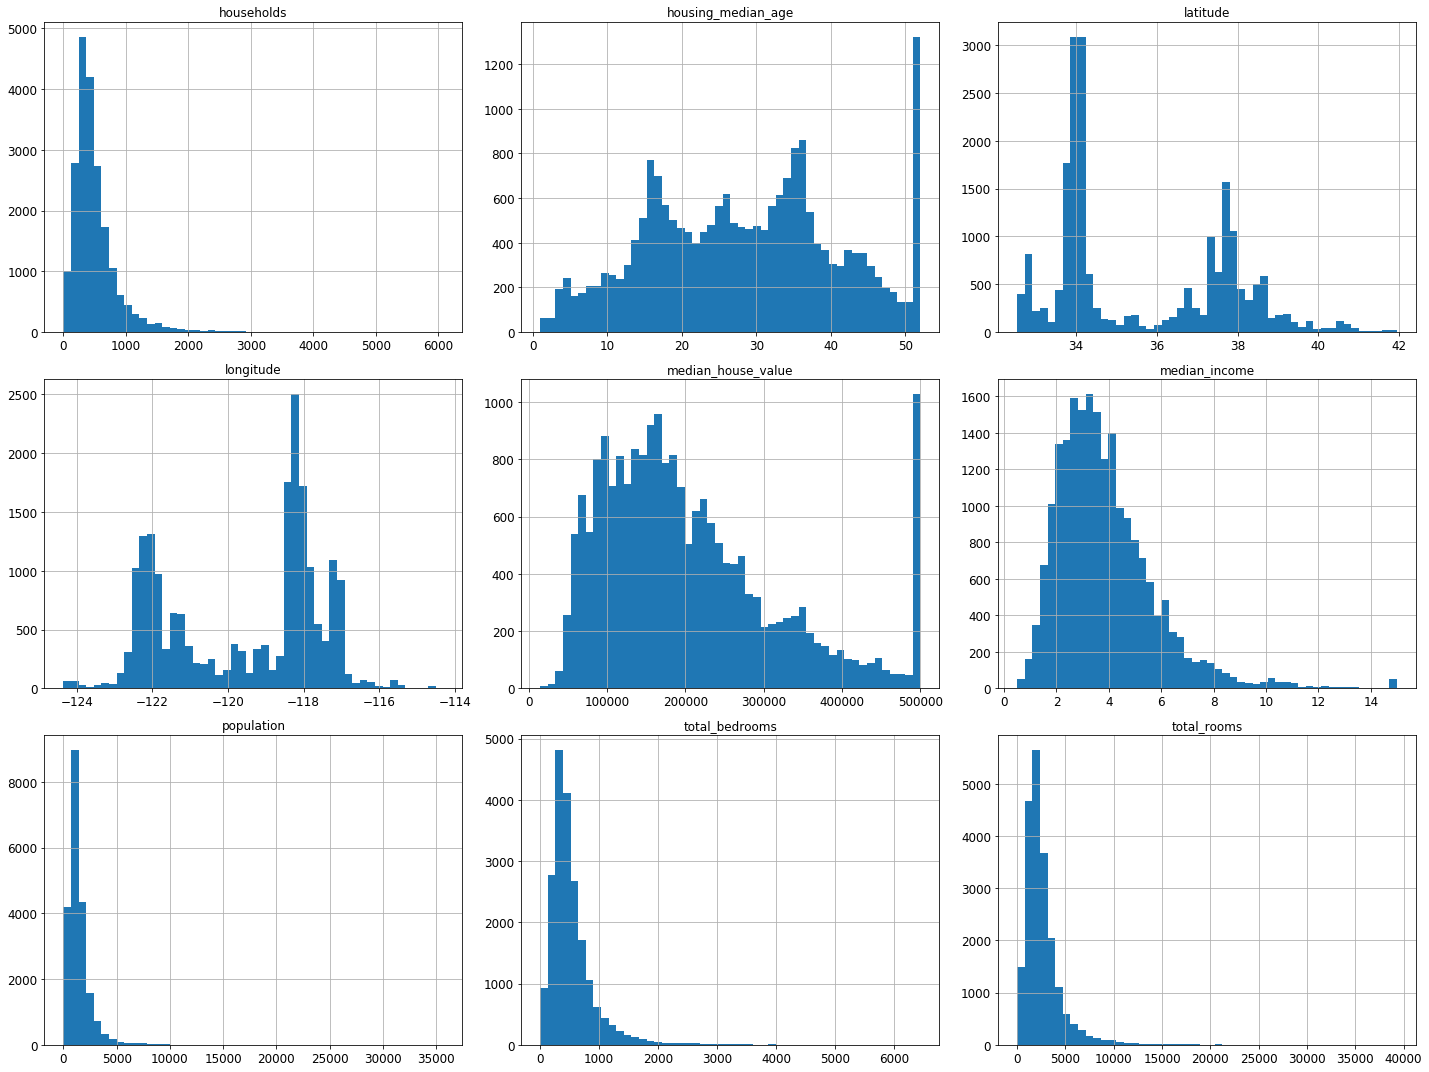

In [9]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

# Creating a test set

### Random Sampling

In [10]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [11]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [12]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set))
print(len(test_set))

16512
4128


In [13]:
#Does the same as the last function
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [14]:
print(len(train_set))
print(len(test_set))

16512
4128


### Stratified sampling.
Suppose you chatted with experts who told you that the median income is a very
important attribute to predict median housing prices. You may want to ensure that
the test set is representative of the various categories of incomes in the whole dataset

Text(0.5, 1.0, 'median_income')

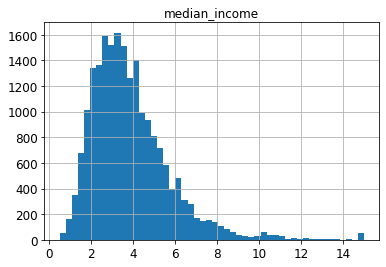

In [15]:
housing.median_income.hist(bins=50)
plt.title('median_income')

The following code uses the
<code>pd.cut()</code> function to create an income category attribute with five categories (labeled
from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from
1.5 to 3, and so on:

In [16]:
#Adding a new 'income_cat' column to the housing DataFrame
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [17]:
#Notice the last column with an income_category for each district
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [18]:
#Counting the new values added for each cat
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

Text(0.5, 1.0, 'income_category')

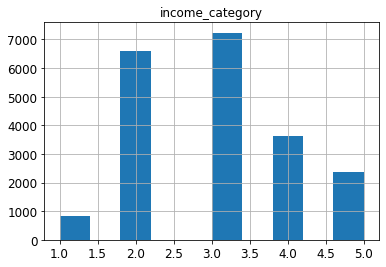

In [19]:
housing["income_cat"].hist()
plt.title('income_category')

In [20]:
#Stratified sampling based on the income category
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [21]:
#Seeing if it actually worked.

#Proportion of income categories in the full dataset
print(housing["income_cat"].value_counts() / len(housing))

#Proportion of the income categories in the stratified train set
print(strat_train_set["income_cat"].value_counts() / len(strat_train_set))

#Proportion of the income categories in the stratified test set
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64
3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64
3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64


In [22]:
#Comparing this proportions with the previous random sampling that didn't take
#the median_income bias into account.

def income_cat_proportions(data):
    return data['income_cat'].value_counts() / len(data)

random_train_set, random_test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    'Overall': income_cat_proportions(housing),
    'Stratified': income_cat_proportions(strat_test_set),
    'Random': income_cat_proportions(random_test_set)
}).sort_index()

compare_props['Rand %error'] = 100 * compare_props['Random'] / compare_props['Overall'] - 100
compare_props['Strat %error'] = 100 * compare_props['Stratified'] / compare_props['Overall'] - 100

compare_props

,Overall,Stratified,Random,Rand %error,Strat %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


Now you should remove the <code>income_cat</code> attribute so the data is back to its original state:

In [23]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [24]:
housing = strat_train_set.copy()

### Visualizing Geographical Data

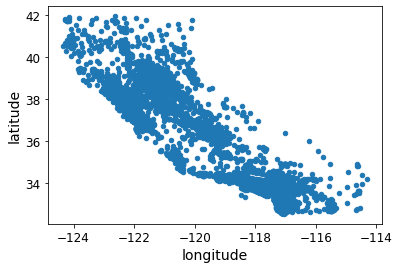

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude")

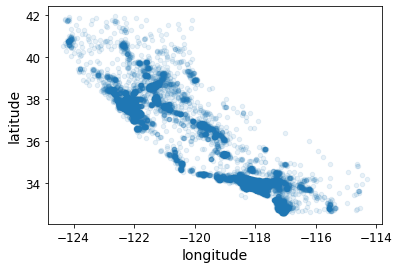

In [26]:
#Alpha option (0.0 transparent through 1.0 opaque)
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

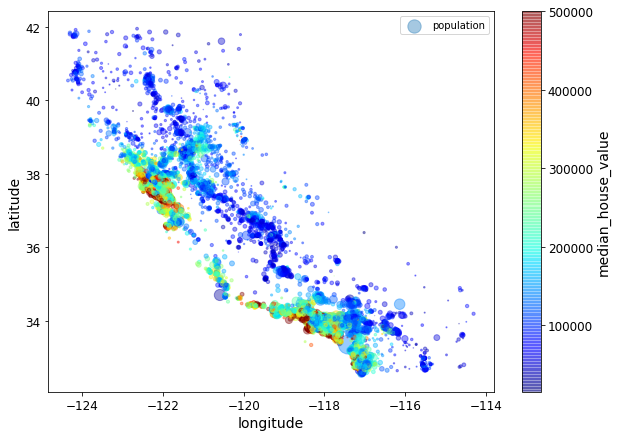

In [27]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

### Looking for Correlations

In [28]:
#Standard correlation coefficient (Pearson's r)
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [29]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Another way to check for correlation between attributes is to use the pandas
<code>scatter_matrix()</code> function, which plots every numerical attribute against every other numerical attribute. Since there are now 11 numerical attributes, you would get
11² = 121 plots, which would not fit on a page—so let’s just focus on a few promising
attributes that seem most correlated with the median housing value

<function pandas.plotting._misc.scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, **kwargs)>

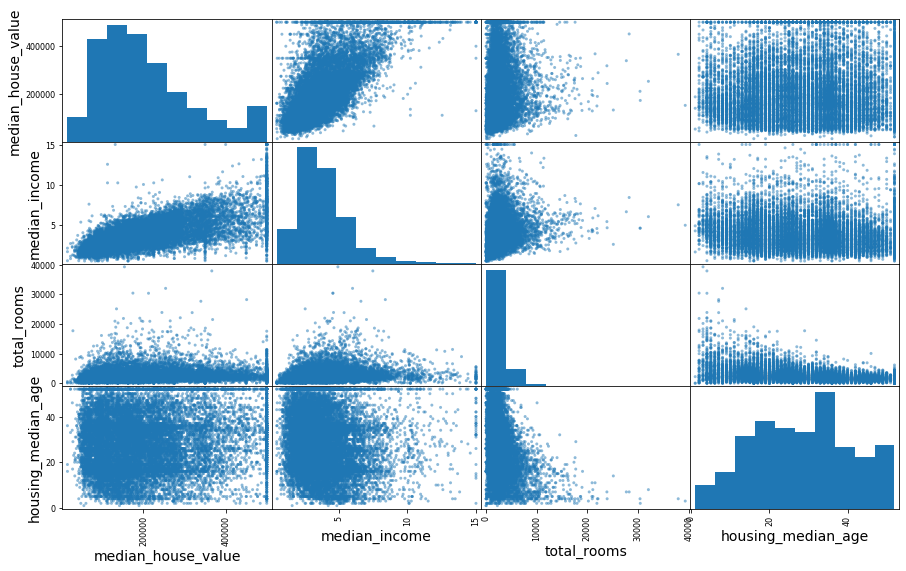

In [30]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value',\
              'median_income',\
              'total_rooms',\
              'housing_median_age'
]
scatter_matrix(housing[attributes], figsize=(15,9))
scatter_matrix

Instead of plotting a straight line in the diagonal, Pandas displays a histogram of each attribute. Pretty neat-o.
The most promising attribute to predict the median house value is the median income, so let's zoom in on their correlation scatterplot.
We notice a strong upward trend. Also the 500k pricecap and some horizontal lines around 450k, 350k and maybe 280k.

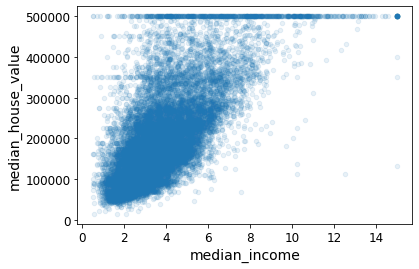

In [31]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

### Experimenting with Attribute Combinations

In [32]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [33]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [34]:
#Looking at the correlation matrix again
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# Prepare the Data for Machine Learning Algorithms

In [35]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy() #labels

### Data Cleaning

First let's have a look at the rows with missing values. This corresponds to what we saw in cell 6 (only the <code>total_bedrooms</code> attribute is missing for 207 rows)

In [36]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


We will fill these missing values for the corresponding missing rows with the column's median.

In [37]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


Scikit-Learn provides a handy class to take care of missing values: <code>SimpleImputer</code>. First we create a <code>SimpleImputer</code> instance specifying that we want to replace each attribute's missing values with the median of said attribute.

In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Note that this will only work for numerical attributes so now we remove any text attribute we had in our full dataset.

In [39]:
#housing_num → only the numerical attributes of the housing DataFrame
housing_num = housing.drop("ocean_proximity", axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

Now we can fit the <code>imputer</code> instance to the training data using the <code>fit()</code> method:

In [40]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

The <code>imputer</code> has simply computed the median of each attribute and stored the result
in its <code>statistics_</code> instance variable. Only the <code>total_bedrooms</code> attribute had missing
values, but we cannot be sure that there won’t be any missing values in new data after
the system goes live, so it is safer to apply the imputer to all the numerical attributes:

In [41]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [42]:
#Checking that this is the same as manually computing the median for each attribute.
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Transforming the training set: (replacing previously missing values with calculated medians)

In [43]:
X = imputer.transform(housing_num) #Numpy array containing the transformed attributes

In [44]:
#Transformed DataFrame.
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
#Checking the replacement for previously missing values
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


### Handling Text and Categorical Attributes

Now let's preprocess the categorical input feature <code>ocean_proximity</code>. Let's look at its value for the first 10 instances:

In [45]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


Let's convert these categories to numbers:

In [46]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [47]:
#Checking the list of categories using the categories_ instance variable
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

This could be problematic since the numbers proximity have no meaning in this scenario. Instead, we will create a binary attribute per category: one attribute equal to 1 when the category is "<1H OCEAN" (and 0 otherwise), another attribute equal to 1 when the category is "INLAND" (and 0 otherwise), and so on. This is called <i>one-hot encoding</i>.

In [48]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

By default, the <code>OneHotEncoder</code> class returns a <i>sparse matrix</i> (only stores the location of the nonzero elements), but we can convert it to a dense array if needed by calling the toarray() method:

In [49]:
housing_cat_1hot.toarray()
#Note that each column represents a category between 1 and 5.
#If the fist (0 indexed) column one has a 1 that means the row (district) corresponds to the first category (<1H OCEAN)

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Once again, you can get the list of categories using the encoder’s <code>categories_</code>
instance variable:

In [50]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom Transformers

Although Scikit-Learn provides many useful transformers, you will need to write
your own for tasks such as custom cleanup operations or combining specific
attributes. For example, here is a small transformer class that adds the combined attributes we
discussed earlier:

In [51]:
housing.values #Notice no labels

array([[-121.89, 37.29, 38.0, ..., 339.0, 2.7042, '<1H OCEAN'],
       [-121.93, 37.05, 14.0, ..., 113.0, 6.4214, '<1H OCEAN'],
       [-117.2, 32.77, 31.0, ..., 462.0, 2.8621, 'NEAR OCEAN'],
       ...,
       [-116.4, 34.09, 9.0, ..., 765.0, 3.2723, 'INLAND'],
       [-118.01, 33.82, 31.0, ..., 356.0, 4.0625, '<1H OCEAN'],
       [-122.45, 37.77, 52.0, ..., 639.0, 3.575, 'NEAR BAY']],
      dtype=object)

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

#TransformerMixin gives us a free fit_transform() method
#BaseEstimator gives us two extra methods: get_params() and set_params()

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    #Constructor
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self #nothing else to do (we're not estimating anything)
    def transform(self, X):
        rooms_per_household = X[:,rooms_ix] / X[:, households_ix]
        population_per_household = X[:,population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            #np.c_ concatenates along second axis (adjacent concatenation)
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [53]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

#important to call the transformer on a numpy array rather that a DataFrame. (housing.values)
# the CombinedAttributesAdder transformer we defined doesn't estimate anything based on the data (no .fit() estimation)
# so there's no need to .fit_transform()
housing_extra_attribs = attr_adder.transform(housing.values) #Returns numpy array

In [54]:
#Back to DataFrame
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns= list(housing.columns) + ["rooms_per_household"] + ["population_per_household"],
    index=housing.index
)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


### Transformation Pipelines.

The <code>Pipeline</code> constructor takes a list of (name,estimator) pairs defining a sequence of steps. All but the last estimator must be a transformer (i.e they must have a <code>fit_transform()</code> method).

When you call the pipeline's <code>fit()</code> method, it calls <code>fit_transform()</code> sequentially on all transformers, passing the output of each call as the parameter to the next call until it reaches the final estimator, for which it calls the <code>fit()</code> method.

The pipeline exposes the same methods as the final estimator. In this example, the last estimator is a <code>StandardScaler</code> which is a transformer, so the pipeline has a <code>transform()</code> method that applies all the transforms to the data in sequence (and of course also a <code>fit_transform()</code> method, which is the one we used).

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # fills in missing values with median of column
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()), #mean-standarization
    ])

#fit_transform() applies the transform method for the last estimator (if it has one) in this case it does
#had we used fit() alone, the StandardScaler() wouldn't have transformed the data
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [56]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [57]:
housing_num_tr.shape #3 columns added from the CombinedAttributesAdder method

(16512, 11)

#### Full Pipeline for both numerical and categorical attributes.
First we import the <code>ColumnTransformer</code> class, next we get the list of numerical column names and the list of categorical column names, and then we construct a <code>ColumnTransformer</code>. The transformer requires a list of tuples (name, transformer, list) where each tuple contains a name, a transformer and a list of names (or indices) of columns that the transformer should be applied to.

Finally, we apply this <code>ColumnTransformer</code> to the housing data: it applies each transformer to the appropriate columns and concatenates the outputs along the second axis (the transformers must return the same number of rows).

In [58]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num) #list containing numerical columns names
cat_attribs = ["ocean_proximity"] #categorial columns names

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing) #fitting the TRAINING SET and transforming it

In [59]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [60]:
housing_prepared.shape 
#5 new columns added (dense matrix) bc the ColumnTransformer calculated a density greater than 0.3 threshold

(16512, 16)

# Select and Train a Model

### Training and Evaluating on the Training Set

In [61]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

#not fitting some_data subset. Instead standarizing with means and stdev's "learned" from fitting the training set
some_data_prepared = full_pipeline.transform(some_data) 
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


Compare against the actual values

In [63]:
print("Labels:", list(some_labels)) #We're off by close to 40%. Badly underfitting.

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


Let's measure this regression model's RMSE on the whole training set using Scikit-Learn's <code>mean_squared_error()</code> function.

In [64]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

Notice the <code>median_house_values</code> range between 120000 and 265000 so a 68628 error means the model is underfitting the training data. We can do better. Let's try selecting a more powerful model.

In [65]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels) #Trained model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [66]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse #Badly overfitting. 0.0 error on the training set.

0.0

### Better Evaluation using Cross-Validation

A good way to evaluate the Decision Tree model is to use Scikit-Learn's <i>K-fold cross-validation</i> feature. The following code randomly splits the training set into 10 distinct subsets called <i>folds</i>, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores:

In [67]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring ="neg_mean_squared_error", cv=10)

#Sklearn cross-validation features expect a utility function. Hence the negative sign
tree_rmse_scores = np.sqrt(-scores)

In [68]:
#Error on the cross-validation 10-folds 
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929
Standard deviation: 2439.4345041191004


The Decision Tree has a score of approximately 71407, generally ±2439. Let's compute the same scores for the Linear Regression model just to be sure.

In [69]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
#Error on the cross-validation 10-folds for linear regression
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798349


This confirms the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.

Note that we random sampled the cross validation folds. In the following code we use the <code>StratifiedKFold</code> class (we will only show this for the Decision Tree model), which performs stratified sampling to produce folds that contain a representative ratio of each class. At each iteration the code creates a clone of the classifier, trains that clone on the training folds, and makes predictions on the test fold. Then it calculates the RMSE with respect to the current test fold labels.

In [70]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

#Copying previous data
X = housing_prepared.copy() #np Array
labelas = housing_labels.copy() #Spanglish for labels (prices). Pandas Series

#Stratification will be based on this 'categoria'. 
#Respecting median_income distribution as an important factor of the median price.
categoria = pd.cut(housing["median_income"],
                   bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                   labels=[1, 2, 3, 4, 5])

y = categoria #Pandas Series

skfolds = StratifiedKFold(n_splits = 10, random_state=42, shuffle=True)
stratified_scores = []
for train_index, test_index in skfolds.split(X, y):
    clone_clf = clone(tree_reg)
    
    #Subseting the matrix of features and vector of labels (FOR TRAINING SET) by stratified indices.
    X_train_folds = X[train_index]
    labelas_train_folds = labelas.iloc[train_index]
    #Subseting the matrix of features and vector of labels (FOR TEST SET) by stratified indices.
    X_test_folds = X[test_index]
    labelas_test_folds = labelas.iloc[test_index]
    
    #Fitting the cloned classifier to the training folds in each iteration.
    clone_clf.fit(X_train_folds,labelas_train_folds)
    
    #Predicting for each test fold in each iteration.
    predictions = clone_clf.predict(X_test_folds)
    
    #Calculating error on the fold corresponding to the test set.
    tree_mse = mean_squared_error(labelas_test_folds, predictions)
    tree_rmse = np.sqrt(tree_mse)
    
    stratified_scores.append(tree_rmse)
    np_stratified_scores = np.array(stratified_scores)
    
display_scores(np_stratified_scores)

Scores: [70283.63786897 71754.04194801 72741.80796129 72735.18173446
 68238.57606337 72543.76023088 70336.13430275 71637.39146656
 73765.38646123 67054.00901644]
Mean: 71108.99270539559
Standard deviation: 2026.8586770077054


#### Trying one last model: Random Forests

In [71]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state = 42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [72]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse #Training set error

18603.515021376355

In [73]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores) #10 cross-validation errors

display_scores(forest_rmse_scores)

Scores: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
Mean: 50182.303100336096
Standard deviation: 2097.0810550985693


This is much better, however, note that the score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set.

# Fine-tune Your Model

Let’s assume that you now have a shortlist of promising models. You now need to
fine-tune them.

### Grid Search

We're going to use Scikit-Learn's <code>GridSearchCV</code>. All we need to do is tell it which hyperparameters we want it to experiment with and what values to try out, and it will use cross-validation to evaluate all the possible combinations of hyperparameter values. For example, the following code searches for the best combinations of hyperparameter values for the <code>RandomForestRegressor</code>:

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8],},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

This <code>param_grid</code> tells Scikit-Learn to first evaluate all 3 $\times$ 4 = 12 combinations of <code>n_estimators</code> and <code>max_features</code> hyperparameter values specified in the first <code>dict</code>, then try all 2 $\times$ 3 = 6 combinations of hyperparameter values in the second <code>dict</code>, but this time with the <code>bootstrap</code> hyperparameter set to <code>False</code> instead of <code>True</code> (which is the default value for this hyperparameter).

The grid will explore 12 $\times$ 6 = 18 combinations of <code>RandomForestRegressor</code> hyperparameter values, and it will train each model 5 times (since we are using five-fold cross validation). In other words, all in all, there will be 18 $\times$ 5 = 90 rounds of training.

We can get the best combination of hyperparameters like this:

In [76]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

We can also get the best estimator directly:

In [77]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Note: If <code>GridSearchCV</code> is initialized with <code>refit=True</code> (which is the
default), then once it finds the best estimator using crossvalidation, it retrains it on the whole training set. This is usually a
good idea, since feeding it more data will likely improve its
performance.

And of course the evaluation scores are also available:

In [78]:
resultados = pd.DataFrame(grid_search.cv_results_)
resultados.iloc[:,:-7].sort_values(by="rank_test_score") #18 rows corresponding to the 18 total combinations of hyperparameters

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,1.813398,0.019183,0.030178,1.719911e-03,8,30,NaN,"{'max_features': 8, 'n_estimators': 30}",-2.357390e+09,-2.546640e+09,-2.591972e+09,-2.318617e+09,-2.527022e+09,-2.468328e+09,1.091662e+08,1
8,1.446028,0.023928,0.028389,1.628492e-03,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.370010e+09,-2.583638e+09,-2.607703e+09,-2.350953e+09,-2.661059e+09,-2.514673e+09,1.285080e+08,2
5,1.062534,0.020986,0.029181,9.716119e-04,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.387153e+09,-2.588448e+09,-2.666426e+09,-2.398071e+09,-2.649316e+09,-2.537883e+09,1.214614e+08,3
17,0.557933,0.005773,0.012793,1.469107e-03,4,10,False,"{'bootstrap': False, 'max_features': 4, 'n_est...",-2.525578e+09,-2.710011e+09,-2.609100e+09,-2.439607e+09,-2.725548e+09,-2.601969e+09,1.088048e+08,4
10,0.601603,0.006217,0.010594,1.015187e-03,8,10,NaN,"{'max_features': 8, 'n_estimators': 10}",-2.571970e+09,-2.718994e+09,-2.842317e+09,-2.460258e+09,-2.776666e+09,-2.674041e+09,1.392777e+08,5
7,0.485588,0.002411,0.009998,6.320563e-04,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.549663e+09,-2.782039e+09,-2.762720e+09,-2.521134e+09,-2.907667e+09,-2.704645e+09,1.471569e+08,6
15,0.451732,0.005231,0.011398,4.892547e-04,3,10,False,"{'bootstrap': False, 'max_features': 3, 'n_est...",-2.757999e+09,-2.851737e+09,-2.830927e+09,-2.672765e+09,-2.786190e+09,-2.779924e+09,6.286720e+07,7
4,0.370069,0.008609,0.010995,8.951265e-04,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.666283e+09,-2.784511e+09,-2.892276e+09,-2.616813e+09,-2.948207e+09,-2.781618e+09,1.268607e+08,8
2,0.699602,0.008962,0.029181,1.163449e-03,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.689185e+09,-3.021086e+09,-2.948330e+09,-2.619995e+09,-2.970968e+09,-2.849913e+09,1.626875e+08,9
13,0.357947,0.005669,0.011601,1.364976e-03,2,10,False,"{'bootstrap': False, 'max_features': 2, 'n_est...",-2.810721e+09,-3.107789e+09,-3.131187e+09,-2.788537e+09,-3.099347e+09,-2.987516e+09,1.539234e+08,10


In [79]:
#RMSE scores
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

### Randomized Search

The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but when the hyperparameter search space is large, it is often preferable to use <code>RandomizedSearchCV</code> instead. This class can be used in much the same was as the <code>GridSearchCV</code> class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. Example: If you let the randomized search run for, say, <code>n_iter =1000</code> iterations, this approach will expore 1000 different combinations of the hyperparameters.

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [81]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [82]:
rnd_resultados = pd.DataFrame(rnd_search.cv_results_)

#10 rows corresponding to 10 combinations of randomly selected hyperparameters (n_estimators and max_features)
rnd_resultados.sort_values(by="rank_test_score") 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.700071,0.030197,0.169479,0.004604,7,180,"{'max_features': 7, 'n_estimators': 180}",-2.274768e+09,-2.475113e+09,-2.558241e+09,-2.261587e+09,-2.509251e+09,-2.415792e+09,1.234603e+08,1
4,6.728507,0.146331,0.115135,0.002034,7,122,"{'max_features': 7, 'n_estimators': 122}",-2.295829e+09,-2.490105e+09,-2.567315e+09,-2.275918e+09,-2.513890e+09,-2.428612e+09,1.193643e+08,2
7,4.159670,0.103302,0.095745,0.002925,5,100,"{'max_features': 5, 'n_estimators': 100}",-2.293212e+09,-2.538021e+09,-2.595201e+09,-2.312129e+09,-2.566701e+09,-2.461052e+09,1.307136e+08,3
8,4.242964,0.023591,0.139472,0.003842,3,150,"{'max_features': 3, 'n_estimators': 150}",-2.397906e+09,-2.625800e+09,-2.656686e+09,-2.381674e+09,-2.675865e+09,-2.547586e+09,1.299283e+08,4
6,2.552601,0.031616,0.080355,0.001018,3,88,"{'max_features': 3, 'n_estimators': 88}",-2.421750e+09,-2.650683e+09,-2.663952e+09,-2.405542e+09,-2.701799e+09,-2.568745e+09,1.278469e+08,5
5,2.302911,0.062918,0.077962,0.008685,3,75,"{'max_features': 3, 'n_estimators': 75}",-2.426584e+09,-2.662806e+09,-2.668221e+09,-2.416089e+09,-2.716755e+09,-2.578091e+09,1.294038e+08,6
2,2.068858,0.012850,0.066773,0.001586,3,72,"{'max_features': 3, 'n_estimators': 72}",-2.432244e+09,-2.669938e+09,-2.663783e+09,-2.416819e+09,-2.718463e+09,-2.580249e+09,1.286391e+08,7
3,0.871135,0.008491,0.020799,0.000406,5,21,"{'max_features': 5, 'n_estimators': 21}",-2.425443e+09,-2.685426e+09,-2.684721e+09,-2.445756e+09,-2.679708e+09,-2.584211e+09,1.215266e+08,8
1,0.637914,0.024932,0.015793,0.001720,5,15,"{'max_features': 5, 'n_estimators': 15}",-2.493183e+09,-2.727145e+09,-2.747621e+09,-2.505491e+09,-2.731163e+09,-2.640921e+09,1.158711e+08,9
9,0.082556,0.002249,0.002997,0.000630,5,2,"{'max_features': 5, 'n_estimators': 2}",-3.977848e+09,-4.159390e+09,-4.040393e+09,-4.162441e+09,-4.415951e+09,-4.151204e+09,1.500772e+08,10


In [83]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51389.889203389284 {'max_features': 5, 'n_estimators': 15}
50796.155224308866 {'max_features': 3, 'n_estimators': 72}
50835.13360315349 {'max_features': 5, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
50774.90662363929 {'max_features': 3, 'n_estimators': 75}
50682.78888164288 {'max_features': 3, 'n_estimators': 88}
49608.99608105296 {'max_features': 5, 'n_estimators': 100}
50473.61930350219 {'max_features': 3, 'n_estimators': 150}
64429.84143294435 {'max_features': 5, 'n_estimators': 2}


Note that we found slightly better hyperparameters using a randomized search:

49150.70756927707 {'max_features': 7, 'n_estimators': 180}

as oposed to our previous grid search:

49682.273345071546 {'max_features': 8, 'n_estimators': 30}

### Analyze the Best Models and Their Errors

Inspecting each attribute's importance for the <code>RandomForestRegressor</code> model with the hyperparameters found in the grid search (not the optimal ones from the randomized search).

In [84]:
feature_importances = grid_search.best_estimator_.feature_importances_
#These are ordered according to housing_prepared 's columns order
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

Let's display these importances scores next to their corresponding attribute names:
Recall  that full_pipeline is an ColumnTransformer instance object.

<code>full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
])</code>

The <code>.named_transformers_["cat"]</code> attribute from the <code>ColumnTransformer</code> class retrieves the <code>OneHotEncoder()</code> constructor. Recall that the <code>.categories_</code> attribute from <code>OneHotEncoder()</code> returns a Numpy array with the names we used to encode the "ocean_proximity" feature in this case.                         <code>array(['1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'] dtype=object)</code>
      
Also recall that the full pipeline first added 3 new feature columns ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"] and then another 5 columns ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], this is the reason why we're putting them together in an <code>attributes</code> list keeping the order from <code>housing_prepared</code>.

In [85]:
extra_attribs = ["rooms_per_hhold", "pop_per_household", "beds_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs #Respecting the order of housing_prepared
print(attributes)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_hhold', 'pop_per_household', 'beds_per_room', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']


In [86]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_household'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'beds_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

With this information, you may try dropping some of the less useful features (e.g apparently only the 'INLAND' <code>ocean_proximity</code> category is really useful, so you could try dropping the others).

### Evaluate Your System on the Test Set

In [87]:
final_model = grid_search.best_estimator_
#This model is already refit to the whole training set(all cv=5 folds)because we didn't change GridSearchCV's refit=True default
final_model 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [88]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

#Note that the full_pipeline is already fit to the train set (housing), so it still has the estimation of the means and 
#standard deviations "learned" from fitting the training set. We need to use these same values to mean-standarize the test set.
#This is the reason why we're using .transform and not .fit_transform. We don't want new means and standard deviations.
X_test_prepared = full_pipeline.transform(X_test)

In [89]:
#Since the final_model is already fit to all 5 folds, we can just use the .predict method
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47730.22690385927

We might want to have an idea of how precise this estimate is. For this, we can compute a 95% *confidence interval* for the test RMSE (generalization error) using <code>scipy.stats.t.interval()</code>:

In [124]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
degrees_freedom = len(squared_errors) - 1
sample_mean = np.mean(squared_errors)
sample_standard_error = stats.sem(squared_errors)

confidence_interval = np.sqrt(stats.t.interval(confidence, degrees_freedom,
                              sample_mean,
                              sample_standard_error))

In [125]:
confidence_interval

array([45685.10470776, 49691.25001878])

Alternatively, we could use a z-score rather than t-scores:

In [126]:
m = len(squared_errors)
zscore = stats.norm.ppf((1+confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(sample_mean - zmargin), np.sqrt(sample_mean + zmargin)

(45685.717918136455, 49690.68623889413)

# Extra material.

### Full pipeline with both preparation and prediction.

In [129]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
])

#Fit all the transforms one after the other and transform the data, 
#then fit the transformed data using the final estimator (LinearRegression() in this case). 

#Since LinearRegression() is an estimator, not a transformer, we only need .fit(), and not .fit_transform()
full_pipeline_with_predictor.fit(housing, housing_labels)

#The .predict() method of a Pipeline() class applies all transformers of the pipeline (it cleans and prepares some_data)
#and then it predicts with the final predictor (LinearRegression() estimator)
full_pipeline_with_predictor.predict(some_data)

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

### Model persistance using joblib

In [133]:
my_model = full_pipeline_with_predictor

In [134]:
import joblib
joblib.dump(my_model, "my_model.pkl")
#and later...
my_model_loaded = joblib.load("my_model.pkl")